In [1]:
import numpy as np
import qiskit
from qiskit import QuantumCircuit
from qiskit.quantum_info import state_fidelity, partial_trace
import matplotlib.pyplot as plt

In [2]:
from qiskit.quantum_info import DensityMatrix, Statevector

def getDensityMatrix(circuit):
    return DensityMatrix(circuit).data

def getStatevector(circuit):
    return Statevector(circuit).data

In [3]:
import warnings
warnings.filterwarnings('ignore')

# 1. Circuits Sampler

## 1.1 Circuit A

In [4]:
def sampleCircuitA(layer=1, qubits=4):
    circuit = QuantumCircuit(qubits)
    
    for i in range(layer):
        for i in range(qubits):
            circuit.h(i)
        circuit.barrier()

#     for i in range(layer):
        for i in range(qubits - 1):
            circuit.cz(i, i + 1)
        
        circuit.barrier()
        
        for i in range(qubits):
            circuit.rx(np.random.uniform(0, 2 * np.pi), i)

        circuit.barrier()

    return circuit

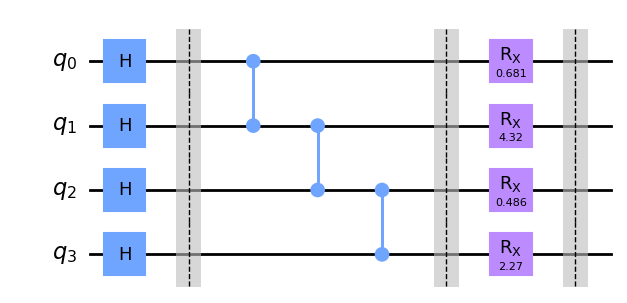

In [5]:
circuitA = sampleCircuitA(qubits=4)
circuitA.draw(output='mpl')

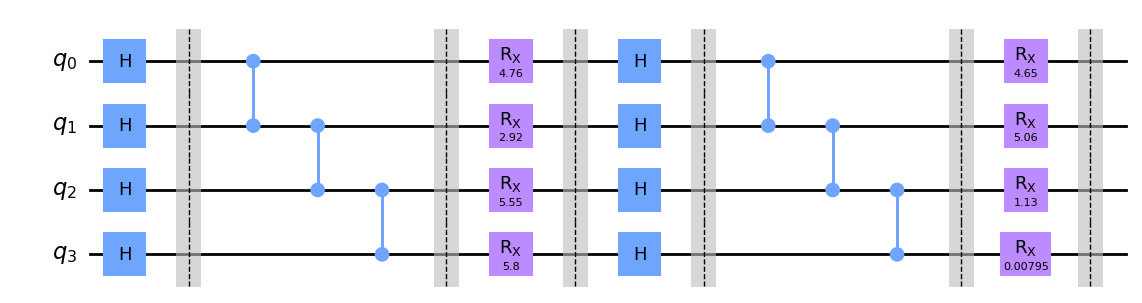

In [6]:
circuitA = sampleCircuitA(layer=2)
circuitA.draw(output='mpl')

## 1.2 Circuit B

In [7]:
def sampleCircuitB(layer=1, qubits=4):
    circuit = QuantumCircuit(qubits)
    
    for i in range(layer):
        circuit.u3(np.random.uniform(0, 2 * np.pi), np.random.uniform(0, 2 * np.pi), np.random.uniform(0, 2 * np.pi), 0)
        circuit.u3(np.random.uniform(0, 2 * np.pi), np.random.uniform(0, 2 * np.pi), np.random.uniform(0, 2 * np.pi), 1)
        circuit.cx(0, 1)
        circuit.barrier()
        
        circuit.u3(np.random.uniform(0, 2 * np.pi), np.random.uniform(0, 2 * np.pi), np.random.uniform(0, 2 * np.pi), 1)
        circuit.u3(np.random.uniform(0, 2 * np.pi), np.random.uniform(0, 2 * np.pi), np.random.uniform(0, 2 * np.pi), 2)
        circuit.cx(1, 2)
        circuit.barrier()
        
        circuit.u3(np.random.uniform(0, 2 * np.pi), np.random.uniform(0, 2 * np.pi), np.random.uniform(0, 2 * np.pi), 2)
        circuit.u3(np.random.uniform(0, 2 * np.pi), np.random.uniform(0, 2 * np.pi), np.random.uniform(0, 2 * np.pi), 3)
        circuit.cx(2, 3)
        circuit.barrier()
    
    return circuit

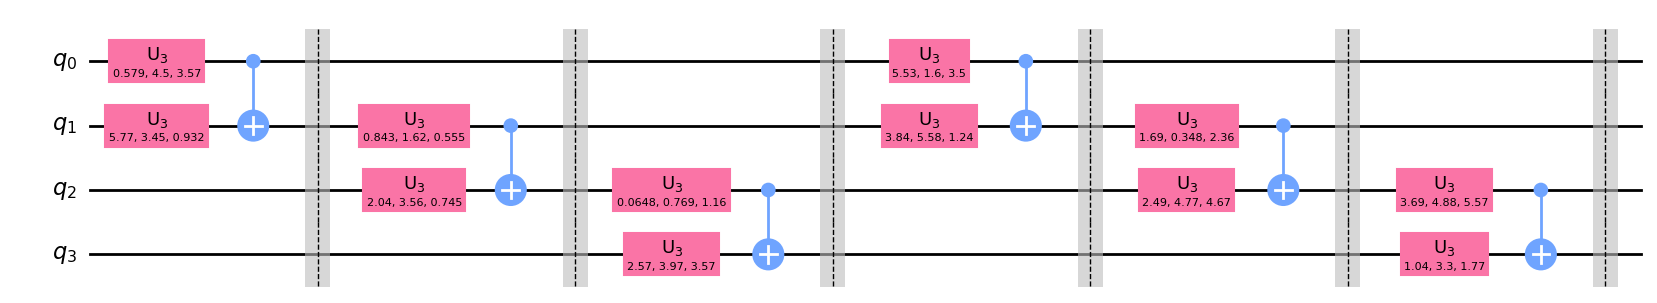

In [24]:
circuitB = sampleCircuitB(qubits=4, layer=2)
circuitB.draw(output='mpl')

## 1.3 Circuit C

In [9]:
def sampleCircuitC(layer=1, qubits=4, encode=False):
    circuit = QuantumCircuit(qubits)
    
    for i in range(qubits):
        circuit.rx(np.random.uniform(0, 2 * np.pi), i)
        circuit.rz(np.random.uniform(0, 2 * np.pi), i)
    circuit.barrier()
    
    for i in range(layer):
        for j in range(qubits - 1):
            circuit.cx(j, j + 1)
        circuit.barrier()
        for i in range(qubits):
            circuit.rx(np.random.uniform(0, 2 * np.pi), i)
            circuit.rz(np.random.uniform(0, 2 * np.pi), i)
        circuit.barrier()

    return circuit

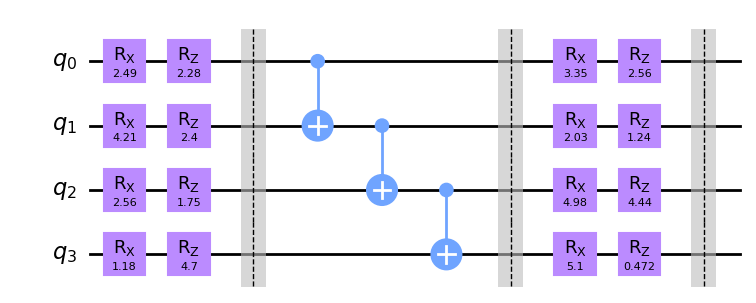

In [10]:
circuitC = sampleCircuitC(qubits=4)
circuitC.draw(output='mpl')

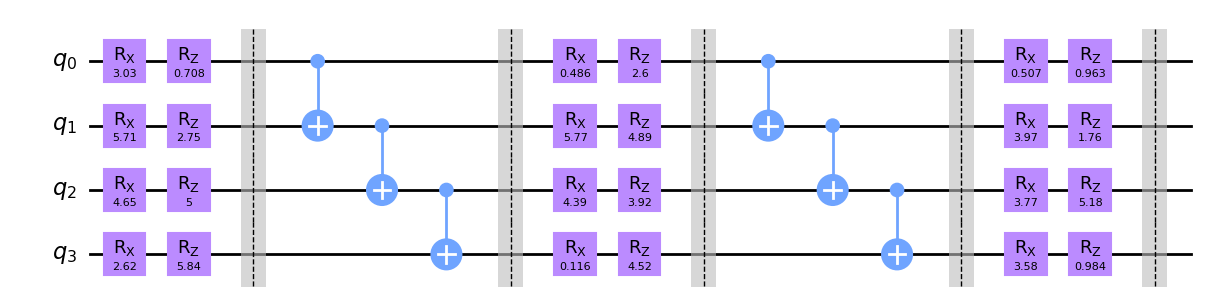

In [11]:
circuitC = sampleCircuitC(layer=2)
circuitC.draw(output='mpl')

# 2. Measure Entanglement

## 2.1 Tool functions

In [12]:
def Q(circuit):
    matrix = getDensityMatrix(circuit)
    n = len(circuit.qubits)
    
    trs = []
    indexes = list(range(n))
    for i in range(n):
        sub_indexes = indexes.copy()
        sub_indexes.remove(i)
        
        rou = partial_trace(matrix, sub_indexes)
        tr = np.abs(np.trace(rou.data @ rou.data))
        trs.append(tr)
        
    tr = sum(trs)
    return 2 * (1 - tr / n)

## 2.2 Measure algorithm

In [13]:
def Ent(sampler, *, epoch=3000, layer=1):
    ent = 0
    for i in range(epoch):
        ent += Q(sampler(layer=layer))
    
    return ent / epoch

## 2.3 Experiment

In [18]:
labels = [
    'Circuit A', 'Circuit B', 'Circuit C'
]

samplers = [
#     sampleCircuitA,
    sampleCircuitB,
    sampleCircuitC,
]

In [23]:
q = 4
for layer in range(2, 3):
    print(f'qubtis: {q}')
    print('-' * 25)

    for (label, sampler) in zip(labels, samplers):
        expr = Ent(sampler, layer=layer, epoch=4000)
        print(f'{label}(layer={layer}): {expr}')
    print()

qubtis: 4
-------------------------
Circuit A(layer=2): 0.7029925637508894
Circuit B(layer=2): 0.6918968498250322



In [48]:
# qubtis: 3
# -------------------------
# Circuit A(layer=1): 0.6250895198409532
# Circuit B1(layer=1): 0.3766363983200744
# Circuit B2(layer=1): 0.7018564970754808
# Circuit B3(layer=1): 0.5360308013165885
# Circuit C(layer=1): 0.5424484664434561
# Circuit D(layer=1): 0.7199518300929971
# Circuit E(layer=1): 0.3378869987590538
# Circuit F(layer=1): 0.43851866658195904
# Circuit G(layer=1): 0.4562627379963823

# qubtis: 4
# -------------------------
# Circuit A(layer=1): 0.624955825301589
# Circuit B1(layer=1): 0.3751439350935839
# Circuit B2(layer=1): 0.7039812681357258
# Circuit B3(layer=1): 0.5368317917354102
# Circuit C(layer=1): 0.5450808873325415
# Circuit D(layer=1): 0.7205600608318794
# Circuit E(layer=1): 0.336812491359023
# Circuit F(layer=1): 0.4363687315000888
# Circuit G(layer=1): 0.457071786263968

# qubtis: 5
# -------------------------
# Circuit A(layer=1): 0.6250444271714576
# Circuit B1(layer=1): 0.37737318504304496
# Circuit B2(layer=1): 0.7025272029472414
# Circuit B3(layer=1): 0.5357725970418474
# Circuit C(layer=1): 0.5471958895623155
# Circuit D(layer=1): 0.7221713934283419
# Circuit E(layer=1): 0.33958586488521425
# Circuit F(layer=1): 0.43727345124558026
# Circuit G(layer=1): 0.4561025635941888

In [49]:
# qubtis: 3
# -------------------------
# Circuit A(layer=2): 0.7242028288236743
# Circuit B1(layer=2): 3.1732394489836225e-15
# Circuit B2(layer=2): 0.8889369961261624
# Circuit B3(layer=2): 0.6157041362487204
# Circuit C(layer=2): 0.7328546280275263
# Circuit D(layer=2): 0.8095458326314742
# Circuit E(layer=2): 0.4899496365910229
# Circuit F(layer=2): 0.561220067390374
# Circuit G(layer=2): 0.6415180805364227

# qubtis: 4
# -------------------------
# Circuit A(layer=2): 0.7250972709797209
# Circuit B1(layer=2): 3.178168839212958e-15
# Circuit B2(layer=2): 0.8888638574578716
# Circuit B3(layer=2): 0.6130017362294037
# Circuit C(layer=2): 0.7319832546074094
# Circuit D(layer=2): 0.8097133032354646
# Circuit E(layer=2): 0.48947828884964817
# Circuit F(layer=2): 0.5629547233319154
# Circuit G(layer=2): 0.6422255444963907

# qubtis: 5
# -------------------------
# Circuit A(layer=2): 0.7266406697122465
# Circuit B1(layer=2): 3.174760454527359e-15
# Circuit B2(layer=2): 0.8882521892174753
# Circuit B3(layer=2): 0.6120081728085291
# Circuit C(layer=2): 0.7326653351151243
# Circuit D(layer=2): 0.8098290850309153
# Circuit E(layer=2): 0.4919521429394929
# Circuit F(layer=2): 0.5597222549585381
# Circuit G(layer=2): 0.6420343020616974

In [50]:
# qubtis: 3
# -------------------------
# Circuit A(layer=3): 0.7973262119064254
# Circuit B1(layer=3): 0.37764512638637177
# Circuit B2(layer=3): 0.7585187544397969
# Circuit B3(layer=3): 0.7109332501357329
# Circuit C(layer=3): 0.7942876291182378
# Circuit D(layer=3): 0.8224614850379648
# Circuit E(layer=3): 0.5789154009946912
# Circuit F(layer=3): 0.6786757371416525
# Circuit G(layer=3): 0.730443575460482

# qubtis: 4
# -------------------------
# Circuit A(layer=3): 0.7969980850242752
# Circuit B1(layer=3): 0.3749542612370732
# Circuit B2(layer=3): 0.7563403422023652
# Circuit B3(layer=3): 0.7095857532220258
# Circuit C(layer=3): 0.7953611900374133
# Circuit D(layer=3): 0.821488427735043
# Circuit E(layer=3): 0.5813670015831572
# Circuit F(layer=3): 0.6786485436126963
# Circuit G(layer=3): 0.731294076264405

# qubtis: 5
# -------------------------
# Circuit A(layer=3): 0.7980783116949681
# Circuit B1(layer=3): 0.37982082907795817
# Circuit B2(layer=3): 0.7564947467072604
# Circuit B3(layer=3): 0.7092684031509315
# Circuit C(layer=3): 0.7945931155545419
# Circuit D(layer=3): 0.8216530432930986
# Circuit E(layer=3): 0.5780033583423628
# Circuit F(layer=3): 0.6763379305277454
# Circuit G(layer=3): 0.7310846199362077

In [51]:
# qubtis: 3
# -------------------------
# Circuit A(layer=4): 0.8123551051852005
# Circuit B1(layer=4): 3.198052933583994e-15
# Circuit B2(layer=4): 0.7619158234405312
# Circuit B3(layer=4): 0.7470944299921124
# Circuit C(layer=4): 0.8142296501362469
# Circuit D(layer=4): 0.8234561312789876
# Circuit E(layer=4): 0.6378007670597345
# Circuit F(layer=4): 0.723677144090771
# Circuit G(layer=4): 0.7774701896188347

# qubtis: 4
# -------------------------
# Circuit A(layer=4): 0.8122664882187006
# Circuit B1(layer=4): 3.2275071504273e-15
# Circuit B2(layer=4): 0.7604588956470925
# Circuit B3(layer=4): 0.7475267540163809
# Circuit C(layer=4): 0.8149928491251893
# Circuit D(layer=4): 0.8230341900666523
# Circuit E(layer=4): 0.6371437282270489
# Circuit F(layer=4): 0.7227813612563696
# Circuit G(layer=4): 0.7774671252056382

# qubtis: 5
# -------------------------
# Circuit A(layer=4): 0.8134665632386291
# Circuit B1(layer=4): 3.20745652260257e-15
# Circuit B2(layer=4): 0.7611566442742304
# Circuit B3(layer=4): 0.7474688133173741
# Circuit C(layer=4): 0.81461466589524
# Circuit D(layer=4): 0.8232643119267568
# Circuit E(layer=4): 0.6393616901754543
# Circuit F(layer=4): 0.7238190760778336
# Circuit G(layer=4): 0.7775424254577399

In [120]:
Ent(sampleCircuitB2, epoch=5000, encode=True)

0.7070436363215019